In [59]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import animation


In [60]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def rosenbrock(x, n):
    return sum(100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(n-1))

In [61]:
def grad_himmelblau(x):
    return [4*x[0]**3+4*x[0]*x[1]-42*x[0]+2*x[1]**2-14,
            4*x[1]**3+4*x[0]*x[1]-26*x[1]+2*x[0]**2-2]

def first_grad_rosenbrock(x):
    return 400*x[0]**3 + 2*x[0] - 400*x[1]*x[0] - 2

def last_grad_rosenbrock(x):
    return 200*x[-1] - 200*x[-2]**2

def middle_grad_rosenbrock(x,i):
    return 400*x[i]**3 + 202*x[i] - 400*x[i+1]*x[i] - 200*x[i-1]**2 - 2

def grad_rosenbrock(x,n):
    
    grad = []

    if n == 1:
        return IndexError 
    if n == 2:
        grad.append(first_grad_rosenbrock(x))
        grad.append(last_grad_rosenbrock(x))
        return grad
    else:
        grad.append(first_grad_rosenbrock(x))
        
        for i in range(1,n-1):
            grad.append(middle_grad_rosenbrock(x,i))  

        grad.append(last_grad_rosenbrock(x))
    
    return grad

In [62]:
grad_rosenbrock([1,2,3,4], 4)

[-400, 1002, 5804, -1000]

In [63]:
a, b = np.mgrid[-6:6:81j, -6:6:81j]

c:\Users\T-Gamer\anaconda3\envs\Geral\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


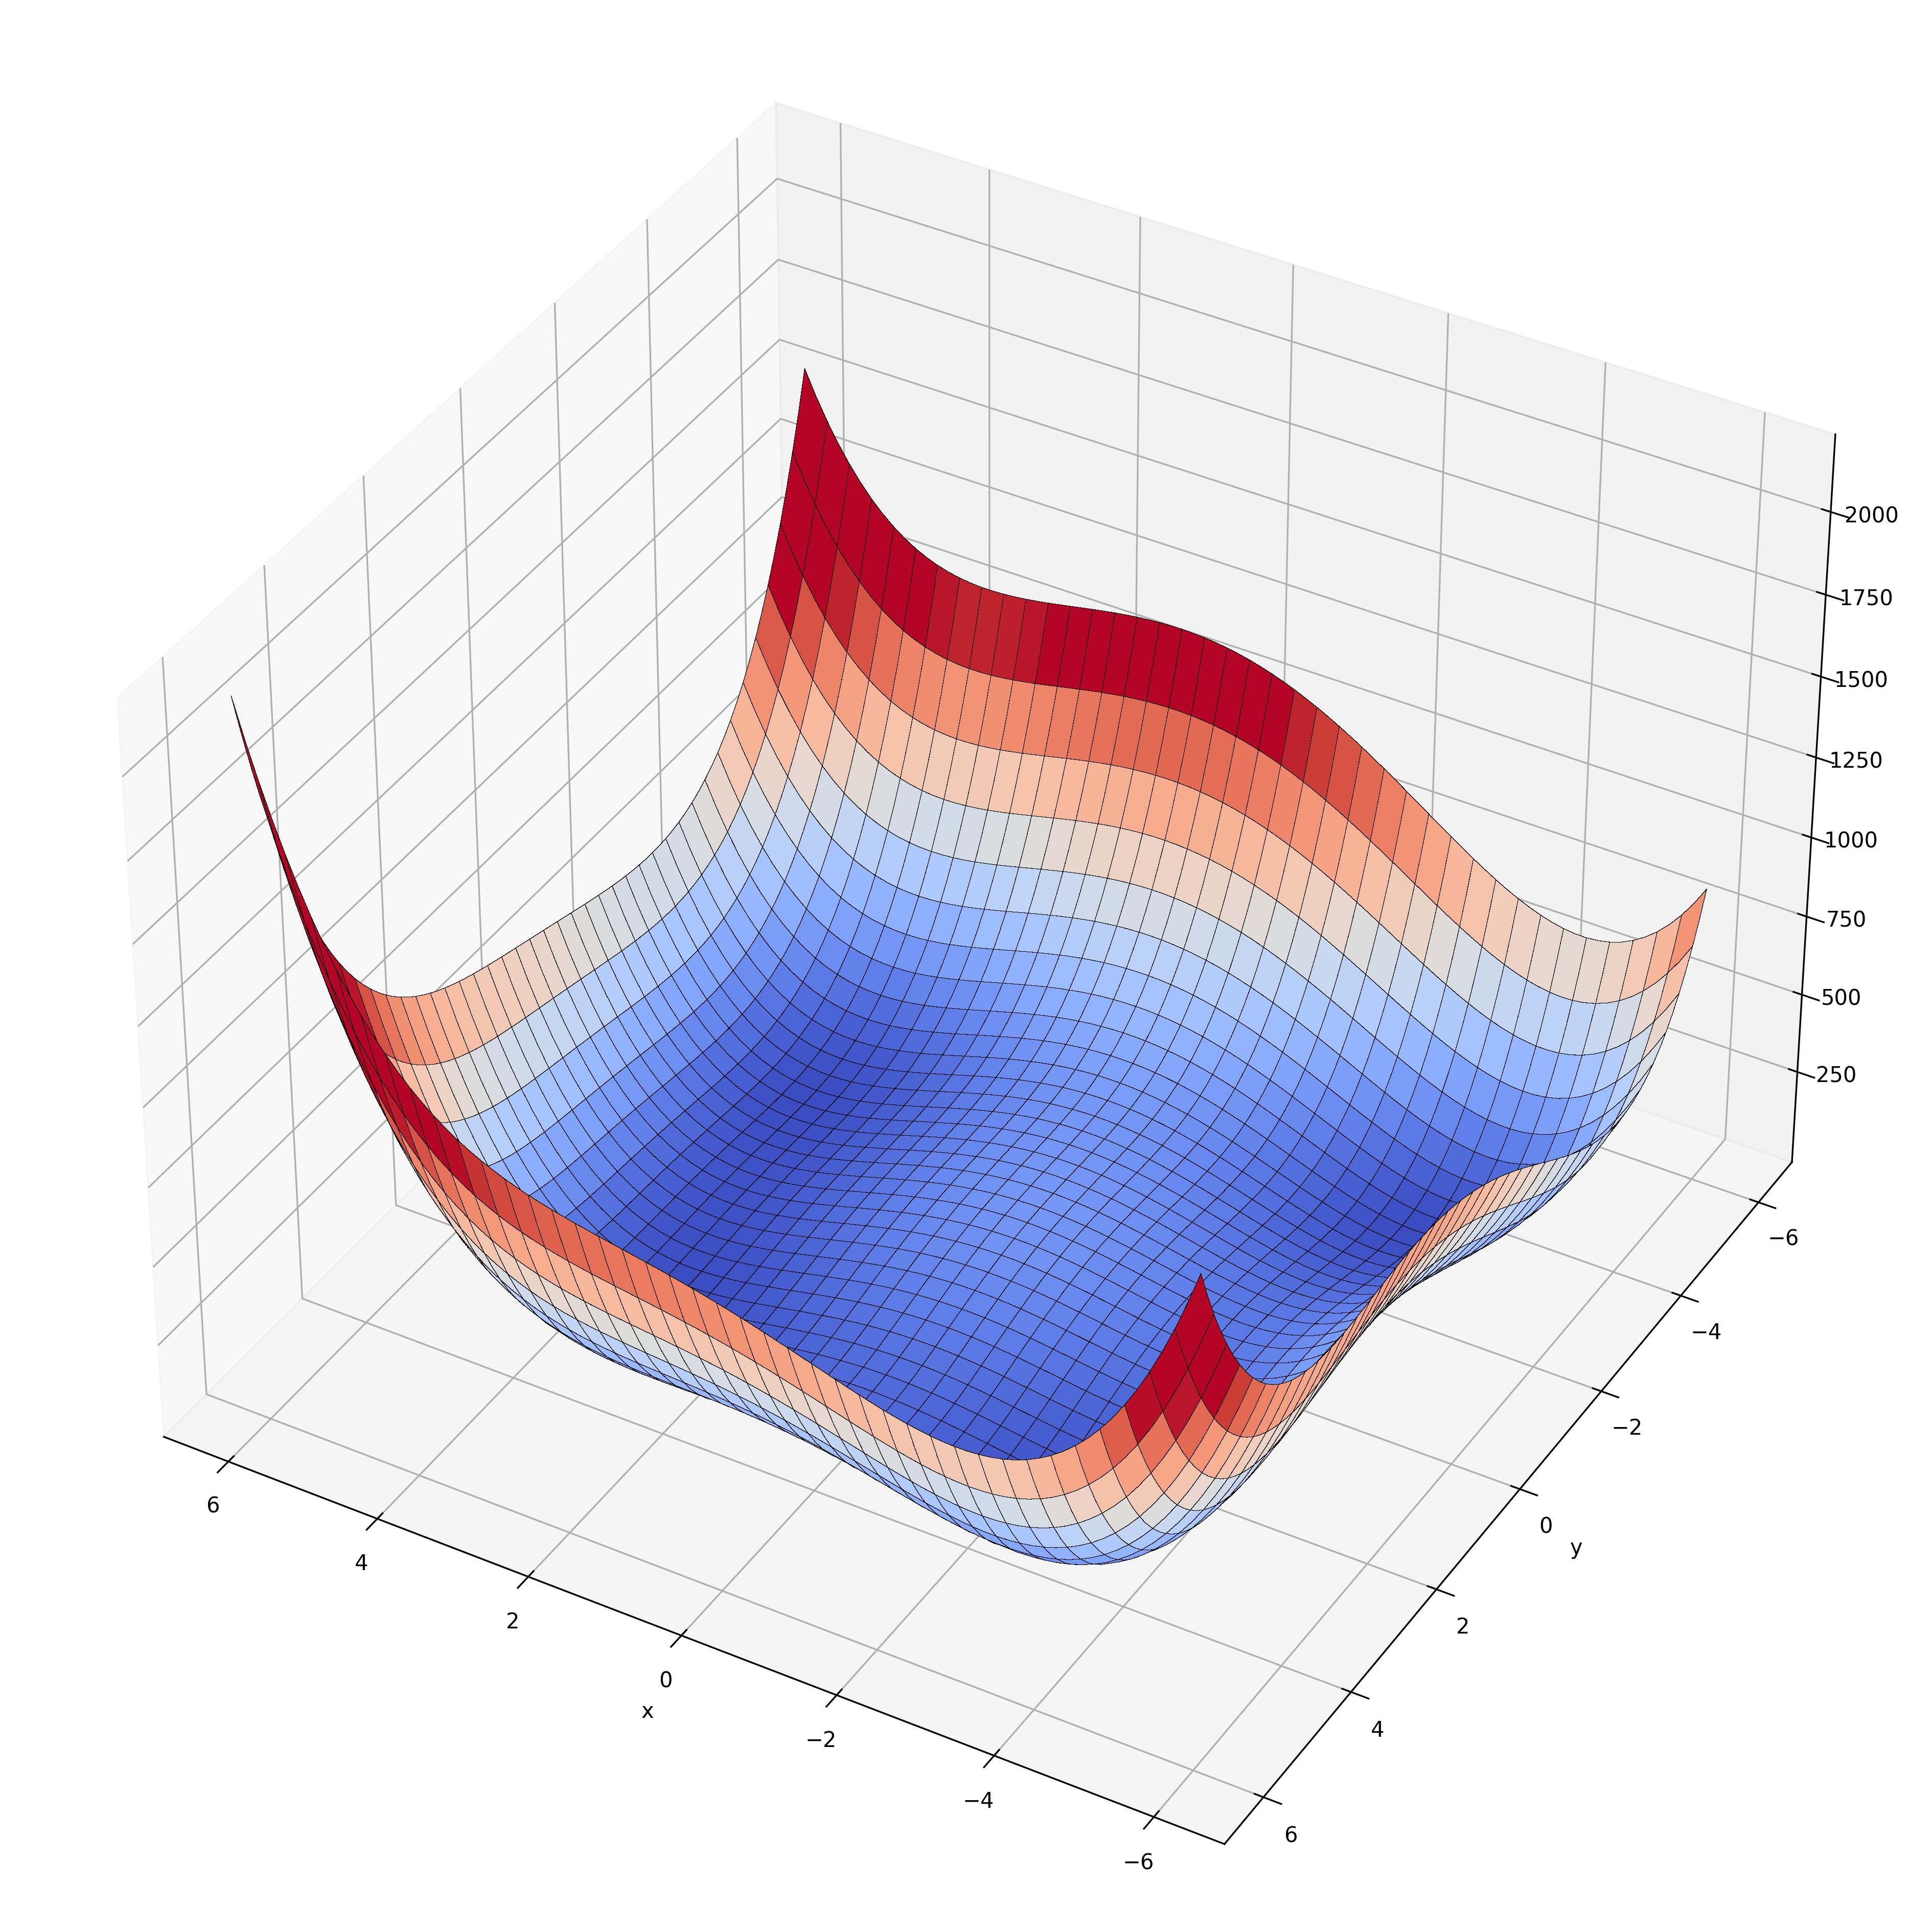

In [98]:
fig1 = plt.figure(figsize = (16,32), dpi = 300)
ax1 = fig1.add_subplot(111, projection='3d')

plot_args = {'rstride': 2, 'cstride': 2, 'cmap':"coolwarm",
             'linewidth': 0.01, 'antialiased': False,
             'vmin': 0, 'vmax': 1000, 'edgecolors':'k'}

ax1.plot_surface(a, b, himmelblau([a,b]), **plot_args)

ax1.view_init(azim= 120, elev= 37)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

fig1.show()

In [99]:
def optimization_himmelblau(alpha,x0, theta, itermax):
    data_points = [x0]
    iteration = 0
    x0 = np.array(x0)
    x1 = np.array([1000, 1000])
    while iteration < itermax:
        iteration+=1
        direction = np.array(grad_himmelblau(x0))
        x1 = np.array(x0) - direction * alpha
        if  np.linalg.norm(x1 - x0) <= theta:
            return data_points, iteration
        data_points.append(x1)
        x0 = x1
    
    return data_points, iteration

In [100]:
data_points_1, iterations_1 = optimization_himmelblau(0.001,[0,0], 0.000001, 100000)
data_points_2, iterations_2 = optimization_himmelblau(0.001,[5,5], 0.000001, 100000)

result1 = [ himmelblau(x) for x in data_points_1]
result2 = [ himmelblau(x) for x in data_points_2]


In [101]:
data_points_1[-1]

array([ 3.61250137, -2.33768379])

In [102]:
data_points_2[-1]

array([ 3.61250145, -2.33768456])

In [103]:
result2[0]

890

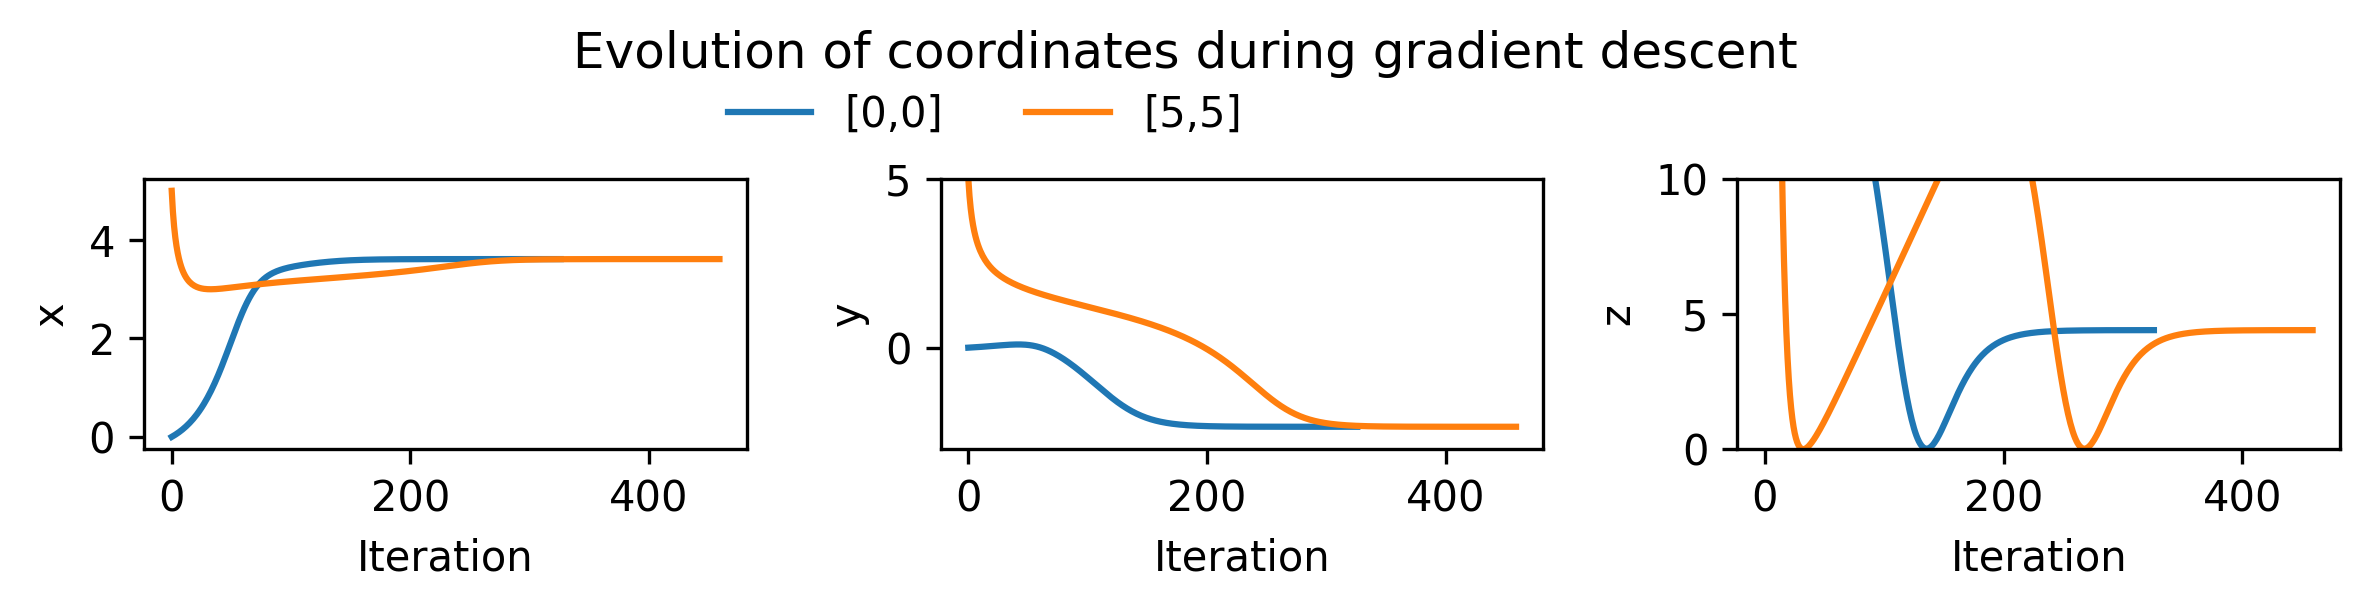

In [104]:
fig2, ax2 = plt.subplots(1,3, figsize = (8,2), dpi = 300)

data_points_1 = np.array(data_points_1)
data_points_2 = np.array(data_points_2)

ax2[0].plot(data_points_1[:,0])
ax2[0].plot(data_points_2[:,0])
ax2[0].set_xlabel('Iteration')
ax2[0].set_ylabel('x')

ax2[1].plot(data_points_1[:,1])
ax2[1].plot(data_points_2[:,1])
ax2[1].set_xlabel('Iteration')
ax2[1].set_ylabel('y')
ax2[1].set_ylim(-3, 5)


ax2[2].plot(result1[:], label = '[0,0]')
ax2[2].plot(result2[:], label = '[5,5]')
ax2[2].set_xlabel('Iteration')
ax2[2].set_ylabel('z')
ax2[2].set_ylim(0, 10)

handles, labels = ax2[2].get_legend_handles_labels()
fig2.legend(handles, labels, loc=(0.3, 0.75), fancybox = False, 
            frameon = False, ncol = 2)
fig2.suptitle('Evolution of coordinates during gradient descent', y = 0.99)

fig2.tight_layout()

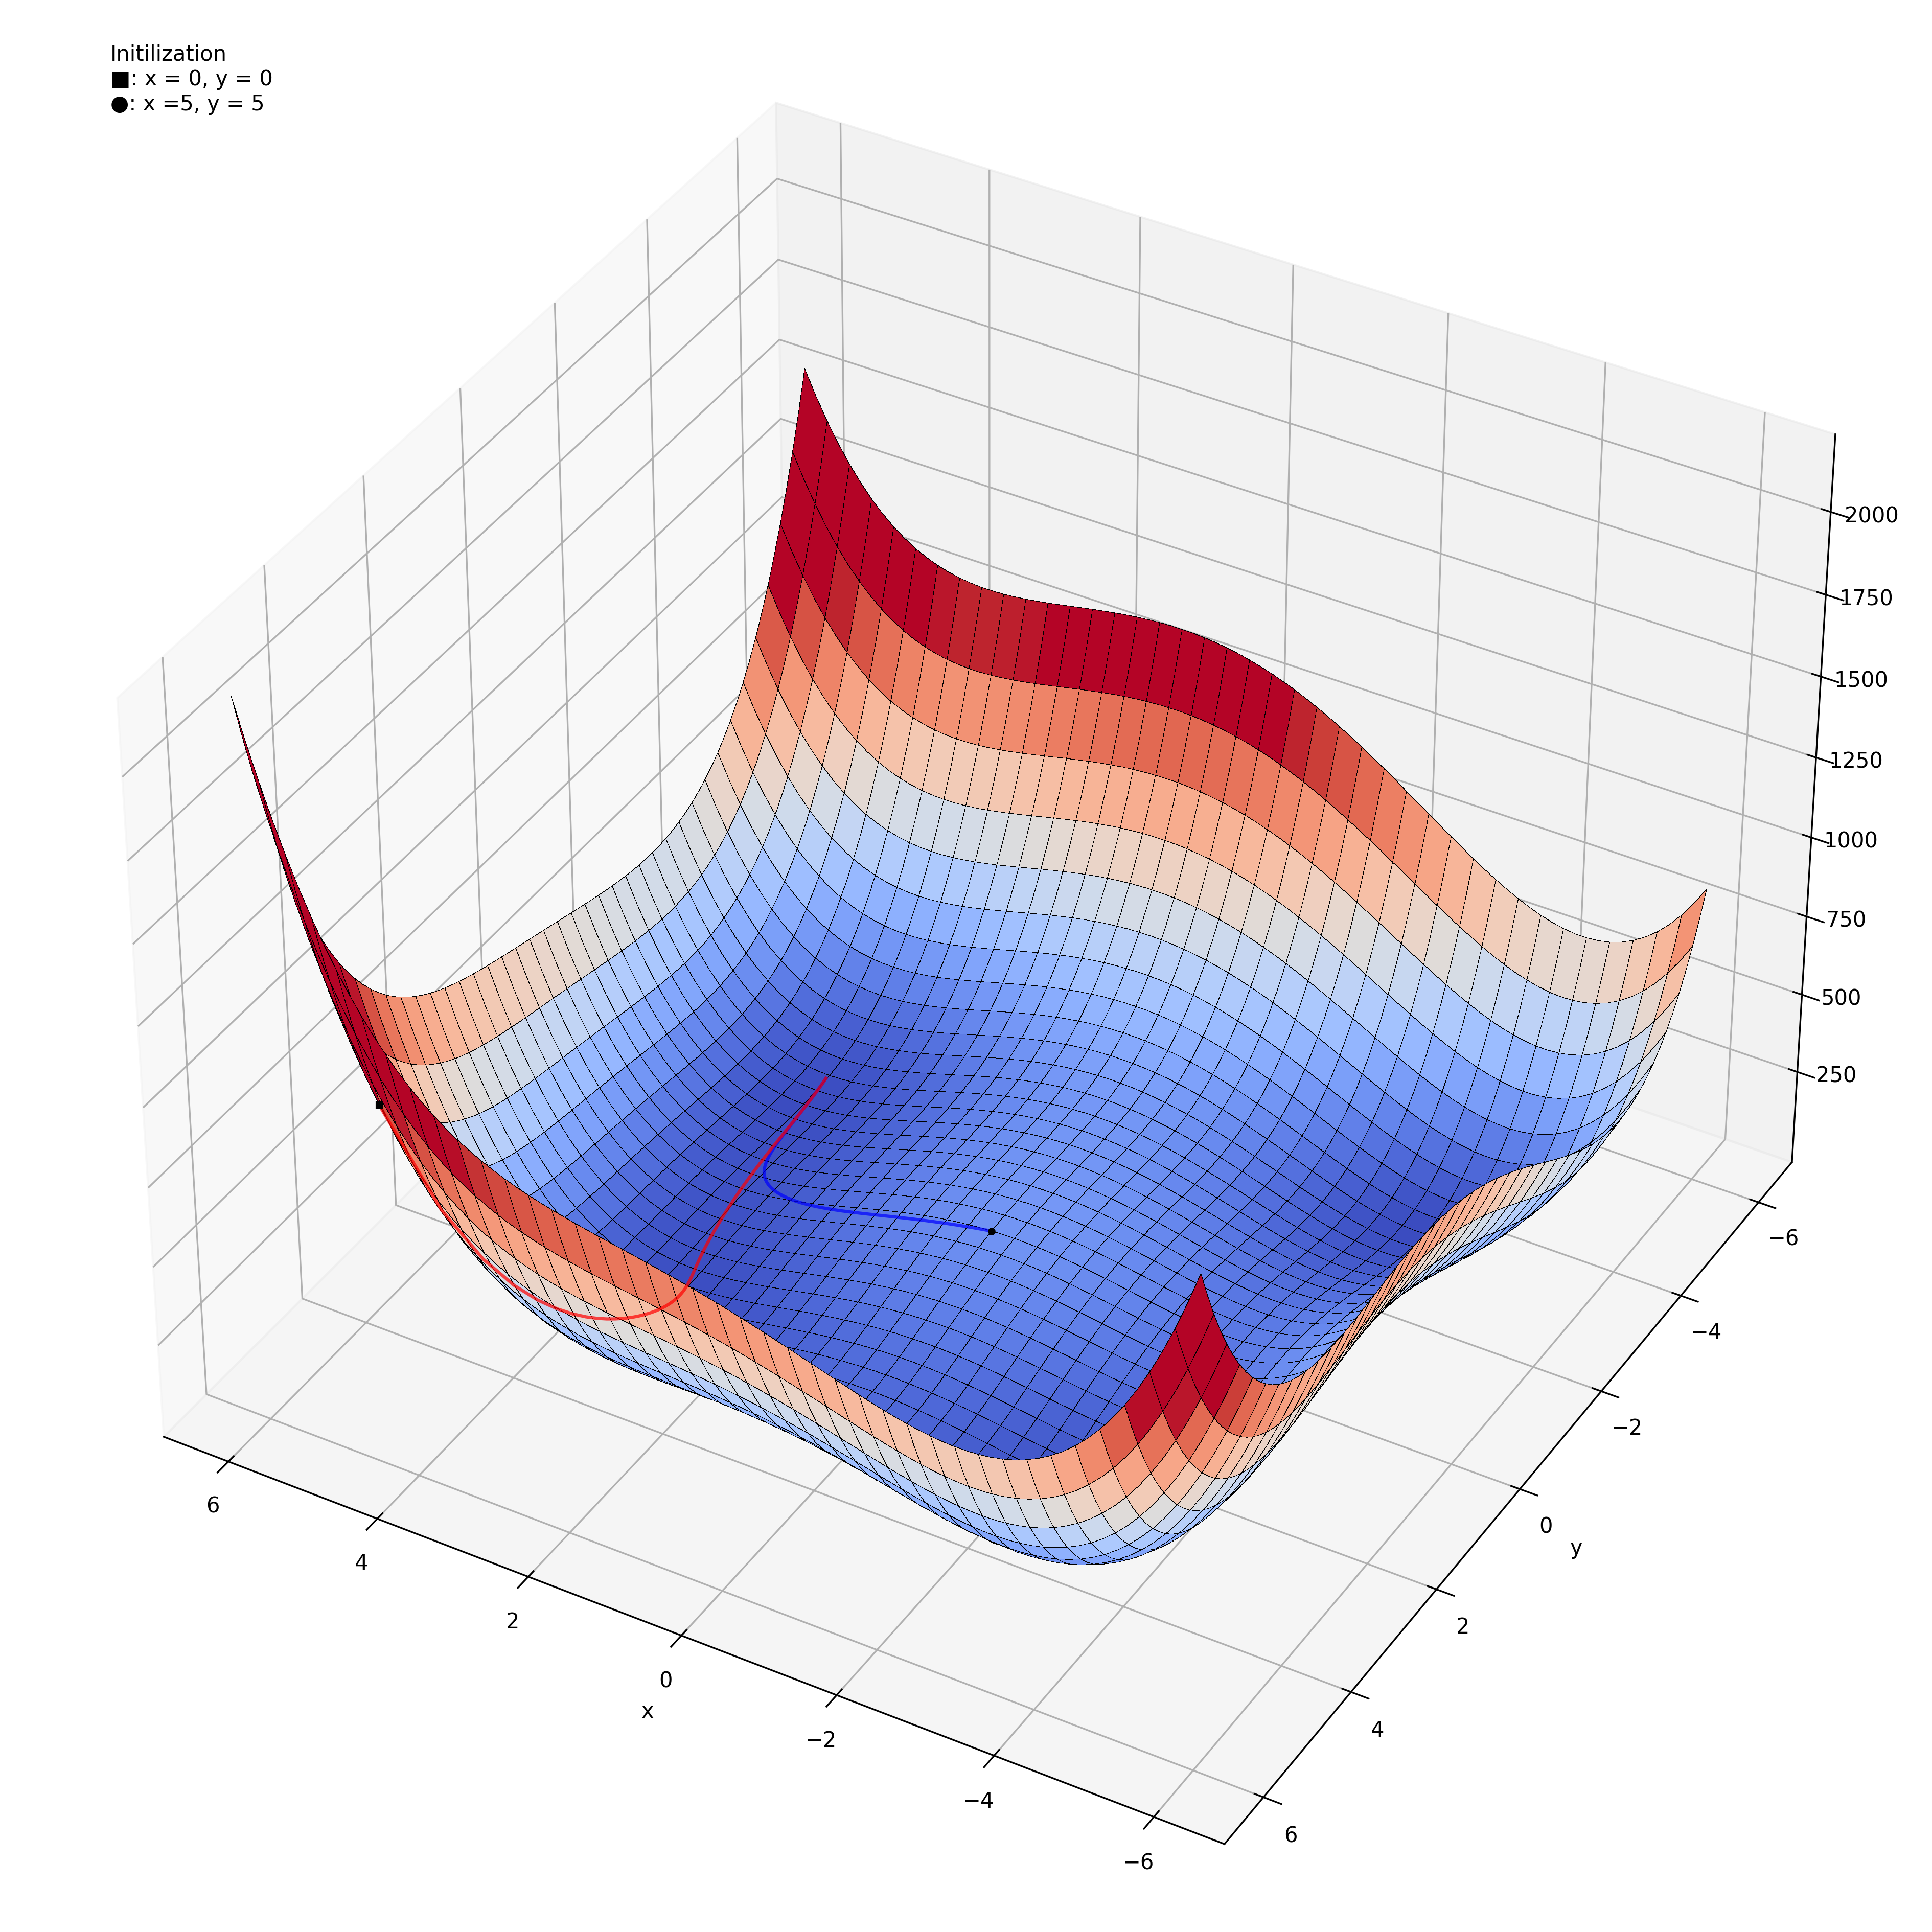

In [105]:
newax = fig1.add_axes(ax1.get_position(), projection='3d',
                     xlim = ax1.get_xlim(),
                     ylim = ax1.get_ylim(),
                     zlim = ax1.get_zlim(),
                     facecolor = 'none',)
newax.view_init(azim= 120, elev= 37)
newax.set_zorder(1)
ax1.set_zorder(0)

newax.plot3D(data_points_1[:,0], data_points_1[:, 1], result1[:], 
             c='blue', alpha = 0.7)
newax.plot3D(data_points_2[:, 0], data_points_2[:, 1], result2[:],
             c='red', alpha = 0.7)

newax.plot3D(data_points_1[0, 0], data_points_1[0, 1], result1[0],
               ms = 2.5, c='black', marker='o')
newax.plot3D(data_points_2[0, 0], data_points_2[0, 1], result2[0],
               ms = 2.5, c='black', marker='s')
newax.set_axis_off()
sq = u'■'
cir = u'●'
ax1.text2D(0.05, 0.95, f'Initilization\n'\
                      f'{sq}: x = 0, y = 0\n'\
                      f'{cir}: x =5, y = 5', transform=ax1.transAxes)


fig1.savefig('Imagem.png')
fig1

In [106]:
def descent_animation(num):
    # Clear the axes where we are plotting the tracjectories
    newax.clear()
    
    # Manually adjust the order of the axes
    newax.set_zorder(1)
    ax.set_zorder(0)
    
    # Hide the axes in the front plane
    newax.set_axis_off()

    # Plot new frame of trajectory line for the symmetry case
    newax.plot3D(data_points_1[:num+1, 0], data_points_1[:num+1, 1],
                 result1[:num+1], c='blue', alpha = 0.7)
    # Updating Point Location
    newax.scatter(data_points_1[num, 0], data_points_1[num, 1], result1[num],
               s = 10, c='blue', marker='o', edgecolor = 'k', linewidth = 0.5)
    # Adding Constant Origin
    newax.plot3D(data_points_1[0, 0], data_points_1[0, 1], result1[0],
               ms = 2.5, c='black', marker='o')


    # Plot new frame of trajectory line for the offset case
    newax.plot3D(data_points_2[:num+1, 0], data_points_2[:num+1, 1],
                 result2[:num+1], c='red', alpha = 0.7)
    # Updating Point Location
    newax.scatter(data_points_2[num, 0], data_points_2[num, 1], result2[num],
               s = 10, c='red', marker='o', edgecolor = 'k', linewidth = 0.5)
    # Adding Constant Origin
    newax.plot3D(data_points_2[0, 0], data_points_2[0, 1], result2[0],
               ms = 2.5, c='black', marker='s')


    # Setting Axes Limits and view angles
    newax.set_xlim3d([-6, 6])
    newax.set_ylim3d([-6, 6])
    newax.set_zlim3d([0, 2000])
    newax.view_init(azim= 120, elev= 37)

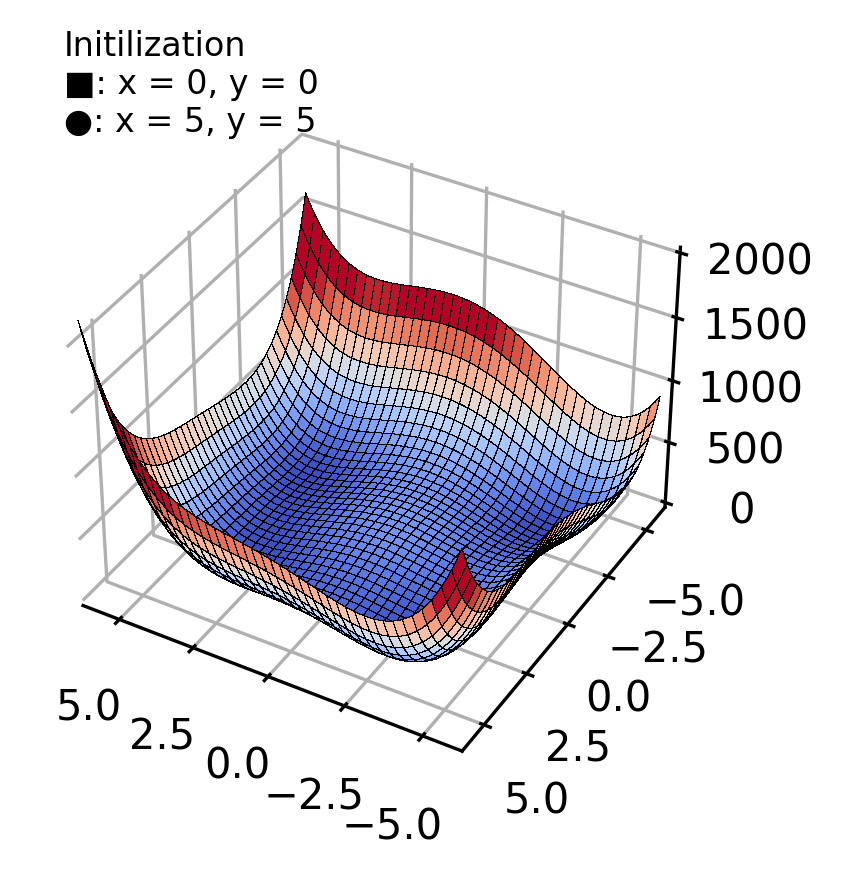

In [107]:
fig = plt.figure(figsize = (4, 3), dpi = 300)
ax = fig.add_subplot(111, projection='3d')

plot_args = {'rstride': 2, 'cstride': 2, 'cmap':"coolwarm",
            'linewidth': 0.01, 'antialiased': False,
            'vmin': 0, 'vmax': 1000, 'edgecolors':'k'}
x, y = np.mgrid[-6:6:81j, -6:6:81j]

# Plot surface
ax.plot_surface(x, y, himmelblau([x,y]), **plot_args)
ax.view_init(azim= 120, elev= 37)
ax.set_xlim3d([-6, 6])
ax.set_ylim3d([-6, 6])
ax.set_zlim3d([0, 2000])

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Add second pair of axes
newax = fig.add_axes(ax.get_position(), projection='3d',
                    xlim = ax.get_xlim(),
                    ylim = ax.get_ylim(),
                    zlim = ax.get_zlim(),
                    facecolor = 'none',)
newax.view_init(azim= 120, elev= 37)

# Manually adjust the order of the axes
newax.set_zorder(1)
ax.set_zorder(0)

# Hide axes in the front plane
newax.set_axis_off()

# Add some text to distinguish the two initialization points
sq = u'■'
cir = u'●'
ax.text2D(0.05, 0.95, f'Initilization\n'\
                      f'{sq}: x = 0, y = 0\n'\
                      f'{cir}: x = 5, y = 5', 
          transform=ax.transAxes,
          fontsize = 8)

# Plotting the Animation
line_ani = animation.FuncAnimation(fig, descent_animation, interval=100,
                                   frames= 200 + 1)
plt.show()

In [90]:
filename = "gradient_func.gif"
writergif = animation.PillowWriter(fps=500)
line_ani.save(filename, writer=writergif)